# **CPSC 483-02 Project 2 Fall 2021** 


---


```
By:
Shervin Afrasiabi | shervina@csu.fullerton.edu 
Yesh Patel        | yesh@csu.fullerton.edu
Vishva Patel      | Vishva360@csu.fullerton.edu
```


---





### *Due October 15th 2021 @ 9:45 pm*

In [9]:
import numpy as np
import matplotlib.pyplot as plt
training_set =[]
test_set =[]
array = np.genfromtxt('dataset.csv', delimiter = ',')
#array1= np.load('dataset-1.csv')#Pickle error
#array1= np.load('dataset-1.csv', allow_pickle=True)#failed to interpret file as a pickle
for i in range(1,101):
    test_set.append(array[i])
for i in range (101,1001):
    training_set.append(array[i])


print("      x1          x2          t")    
for i in range(0,9):
    print(training_set[i])

      x1          x2          t
[0.01891058 5.4709072  2.05314819]
[-0.66329468  3.80845307 -3.3801093 ]
[-0.26656312 -0.63728889  2.03638963]
[ 1.62073913 -0.06023901  0.02590559]
[ 1.18004104 -1.9221495   1.65864193]
[-0.68779768  1.44273017  3.1751415 ]
[-2.17793676 -2.46935626  1.23350714]
[ 1.43918665  3.87737396 -2.00963634]
[ 1.82294781  2.00862975 -4.11046838]


# 1 & 2
The cell above will import the dataset.csv and put the first 100 elements(10%) into a test set and the remaining 900 elements (90%) into a training set. We also examine the first few elemenets of the training set to ensure everything was imported properly.

In [10]:
from numpy.linalg import inv
set1 = np.array(training_set)

prexVector = set1[:,0:2]
xVector = np.insert(prexVector, 0,1,axis = 1) # prepend a column of 1's to our new X vector to help find W0
tVector = set1[:,2]
tX = np.transpose(xVector) # tx = X transposed
xInv = np.linalg.inv(np.dot(tX,xVector)) # xInv = (X^T * X)
xTxinvXT = np.dot(xInv,tX) # (X^T * X) * X^T
Weight_Vector = np.dot(xTxinvXT,tVector)

Weight_Vector

array([0.59088086, 0.04935279, 0.00763617])

# 3

$\hat{w_{0}}$ = 0.59088086

$\hat{w_{1}}$ = 0.04935279

$\hat{w_{2}}$ = 0.00763617

The above values found in our weight vector allow us to put together the linear model:

$\mathcal{F}$(${x_{1}}$,${x_{2}}$;${w_{0}}$, ${w_{1}}$, ${w_{2}}$) = 0.59088086 + 0.04935279${x_{1}}$  +  0.00763617${x_{2}}$

And thus can lead to our evaluation of the predicted response:

In [11]:
predicted_response = np.dot(Weight_Vector, np.transpose(xVector))
#print a few values, not all
for i in range(0,10):
    print(predicted_response[i])
    
n = len(training_set)
weights = np.array(Weight_Vector)
t1 = np.transpose(np.dot(xVector,weights)) # x * weight vector transposed
t2 = np.transpose(tVector) # target vector transposed
tTotal = np.subtract(t2,t1) # target vector transposed - weight vector transposed
v1 = np.dot(xVector,weights) # X * weight vector
v2 = np.subtract(tVector,v1) # target vector - X * weight vector
v3 = np.dot(tTotal,v2) # transposed total * target vector - X * weight vector 
print("\n Average Square Loss:",v3*(1/n)) # 1/n * new total = average square loss

0.6335909467014439
0.5872274275556582
0.5728587796976261
0.6704088601005193
0.6344413097371794
0.56795306597714
0.4645371778883083
0.6915170342482392
0.6961866628932238
0.5640523163175607

 Average Square Loss: 8.59124007116325


# 4
The cell above well evaluate the predicted response for each input. We print the first 10 values to show a few example expected responses.

$\mathcal{L}$ = $\frac{1}{n}$ ($\vec{t}$ - X$\vec{w}$)$^{T}$ ($\vec{t}$ - X$\vec{w}$) | The average square loss was computed as $\mathcal{L}$ = 8.59124007116325

# 5
To begin developing a quadratic model, we first must add two columns to our xVector, X$_{1}^{2}$ and X$_{2}^{2}$. We then loop through the new 900x5 Matrix, and assign each value in columns 4/5 as the squares of columns 2/3

In [12]:
qXVector = np.insert(xVector,  3, 0, axis =1)
qXVector = np.insert(qXVector, 4, 0, axis =1)

for i in range (len(qXVector)):
    qXVector[i][3] = qXVector[i][1]**2
    qXVector[i][4] = qXVector[i][2]**2

print("  x0               x1         x2           x1^2         x2^2")
for i in range(1,11):
    print(qXVector[i])

  x0               x1         x2           x1^2         x2^2
[ 1.         -0.66329468  3.80845307  0.43995983 14.5043148 ]
[ 1.         -0.26656312 -0.63728889  0.0710559   0.40613713]
[ 1.          1.62073913 -0.06023901  2.62679531  0.00362874]
[ 1.          1.18004104 -1.9221495   1.39249686  3.69465871]
[ 1.         -0.68779768  1.44273017  0.47306565  2.08147033]
[ 1.         -2.17793676 -2.46935626  4.74340855  6.09772033]
[ 1.          1.43918665  3.87737396  2.0712582  15.03402881]
[1.         1.82294781 2.00862975 3.32313872 4.03459347]
[ 1.         -0.56197037  0.11867978  0.3158107   0.01408489]
[ 1.         -1.05221668  2.34914836  1.10715993  5.518498  ]


# 5

In this cell we finish developing our X Vector for the quadratic model, we print the first few elements as an example.

In [13]:
tQX = np.transpose(qXVector) # tx = X transposed
QXInv = np.linalg.inv(np.dot(tQX,qXVector)) # xInv = (X^T * X)
QxTxinvXT = np.dot(QXInv,tQX) # (X^T * X) * X^T
QWeight_Vector = np.dot(QxTxinvXT,tVector)

QWeight_Vector

array([0.48423562, 0.04961768, 0.01021747, 0.03178445, 0.00583313])

# 5

Using the same method as before, we compute the Quadratic Weight Vector as:

$\hat{w_{0}}$ = 0.48423562

$\hat{w_{1}}$ = 0.04961768

$\hat{w_{2}}$ = 0.01021747

$\hat{w_{3}}$ = 0.03178445

$\hat{w_{4}}$ = 0.00583313

The above values found in our weight vector allow us to put together the quadratic model:

$\mathcal{F}$(${x_{1}}$,${x_{2}}$,$x_{1}^{2}$,$x_{2}^{2}$;${w_{0}}$, ${w_{1}}$, ${w_{2}}$, ${w_{3}}$, ${w_{4}}$) = 0.48423562 + 0.04961768${x_{1}}$  +  0.01021747${x_{2}}$  + 0.03178445$x_{1}^{2}$ + 0.00583313$x_{2}^{2}$

In [14]:
n = len(training_set)
weights = np.array(Weight_Vector)
t1 = np.transpose(np.dot(xVector,weights)) # x * weight vector transposed
t2 = np.transpose(tVector) # target vector transposed
tTotal = np.subtract(t2,t1) # target vector transposed - weight vector transposed
v1 = np.dot(xVector,weights) # X * weight vector
v2 = np.subtract(tVector,v1) # target vector - X * weight vector
v3 = np.dot(tTotal,v2) # transposed total * target vector - X * weight vector 
print("\nAverage Square Loss: ", v3*(1/n)) # 1/n * new total = average square loss
MSE = np.square(np.subtract(tVector,predicted_response)).mean()
print(f"{MSE= }")


Average Square Loss:  8.59124007116325
MSE= 8.59124007116325


# 5


$\mathcal{L}$ = $\frac{1}{n}$ ($\vec{t}$ - X$\vec{w}$)$^{T}$ ($\vec{t}$ - X$\vec{w}$) | The average square loss was computed as $\mathcal{L}$ = 8.59124007116325

As seen above, the training MSE for the quadratic model came out to be 8.580310289844942. 

# 6
Now: we will use the test set we put aside during (step #2) in order to determine which model performs better: the linear or quadratic.

In [15]:

set2 = np.array(test_set)

# Linear Test Vector Computed
testxVector = set2[:,0:2]
testxVector = np.insert(testxVector, 0, 1,axis = 1)
testtVector = set2[:,2]

Expected_Lin_Test_Outputs = np.dot(Weight_Vector, np.transpose(testxVector))

linTestMSE = np.square(np.subtract(testtVector,Expected_Lin_Test_Outputs)).mean()
print(f"{linTestMSE= }")

# Quadratic Test Vector Computed
qtestxVector = np.insert(testxVector, 3, 0, axis =1)
qtestxVector = np.insert(qtestxVector, 4, 0, axis =1)

for i in range (len(qtestxVector)):
    qtestxVector[i][3] = qtestxVector[i][1]**2
    qtestxVector[i][4] = qtestxVector[i][2]**2

Expected_Quad_Test_Outputs = np.dot(QWeight_Vector, np.transpose(qtestxVector))

quadTestMSE = np.square(np.subtract(testtVector,Expected_Quad_Test_Outputs)).mean()
print(f"{quadTestMSE= }")



linTestMSE= 8.000051210628891
quadTestMSE= 7.9817883471794255


# 6

As seen above, the linear model test set yields the MSE of:

$\frac{1}{n}$$\sum_{n=1}^{100} $(testtVector - Expected_Lin_Test_Outputs)$^{2}$ = 8.000051210628891

And the quadratic model test set yields an MSE of: 

$\frac{1}{n}$$\sum_{n=1}^{100} $(testtVector - Expected_Quad_Test_Outputs)$^{2}$ = 7.9817883471794255



Based off of these reports: we can conclude that because the quadratic MSE is smaller than the linear MSE, the quadratic model is determined to be more accurate, as the predicted response in the quadratic model was much closer to the actual value than that of the linear model. This fits our expectations, because as we increase the polynomial degree of our model, it is expected to have a smaller MSE.

In [16]:
max_order = 8
a = []
for i in range(0,900):
    a.append(training_set[i])
set = np.array(a)
originalX = set[:,0:2]
X = originalX
t = set[:,2]
sizes = np.tile(int(len(t)/float(5)),(1,5))
c_sizes = np.hstack((0,np.cumsum(sizes)))
cv_loss = np.zeros((5, max_order))
train_loss = np.zeros((5, max_order))

for k in range(1,max_order+1):
    for fold in range(5):
        X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
        X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
        t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        w = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,t_train))
        fold_pred = np.dot(X_fold,w)
        cv_loss[fold,k-1] = ((fold_pred - t_fold)**2).mean()
        train_pred = np.dot(X_train,w)
        train_loss[fold,k-1] = ((train_pred - t_train)**2).mean()
    X = np.hstack((X, originalX**(k+1)))

# 7

Above, we implement 5 fold cross validation on our training set to compute the average cross validation MSE and the average training MSE for all polynomials from powers 1 through 8.

Below we print the average training and validation MSEs for each polynomial order.

In [17]:
cvarray = []
tlarray = []
print("Validation MSE values")
for j in range(0,8):
    cvsum = 0
    for i in range(0,5):
        cvsum += cv_loss[i][j]
    cvMSE = cvsum / 5
    cvarray.append(cvMSE)
    print("MSE for order", j+1, ": " ,cvMSE)

print("\nTraining MSE values")
for j in range(0,8):
    tlsum = 0
    for i in range(0,5):
        tlsum += train_loss[i][j]
    tlMSE = tlsum / 5
    tlarray.append(tlMSE)
    print("MSE for order", j+1, ": " ,tlMSE)

Validation MSE values
MSE for order 1 :  9.028714577968595
MSE for order 2 :  8.852636483506327
MSE for order 3 :  8.885980986577652
MSE for order 4 :  8.962449121431252
MSE for order 5 :  8.96561273805747
MSE for order 6 :  8.879008864174612
MSE for order 7 :  8.915307827204677
MSE for order 8 :  8.93730722156345

Training MSE values
MSE for order 1 :  8.929821328643104
MSE for order 2 :  8.674482570485242
MSE for order 3 :  8.667807153764972
MSE for order 4 :  8.587429950508362
MSE for order 5 :  8.502711435857742
MSE for order 6 :  8.441766178805404
MSE for order 7 :  8.428955104015628
MSE for order 8 :  8.398458624455413


Text(0, 0.5, 'Mean Square Error')

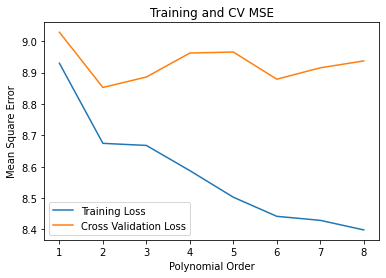

In [18]:
plt.plot(range(1,9), tlarray, label="Training Loss")
plt.plot(range(1,9), cvarray, label="Cross Validation Loss")
plt.legend()
plt.title("Training and CV MSE")
plt.xlabel("Polynomial Order")
plt.ylabel("Mean Square Error")



# 8
In the plot above, we can see two important trends: namely for the blue line (training loss) continues to decrease as the polynomial power increases indefinitely (which we would expect to happen). The other is the change around order 2 for the cross validation loss, we notice the MSE switches from decreasing to increasing. This suggests that the polynomial order to best model the data is order 2 because it has the lowest MSE (8.85263) of all the other polynomial orders. The trend switches again at order 6, where the MSE goes from decreasing to increasing again. This suggests that our data is overfitting starting at polynomial order 6 and above. 

In [19]:
print(f"{quadTestMSE= }")

quadTestMSE= 7.9817883471794255


# 9

Based on our results in experiment 8, we concluded that our best order polynomial to best model the experminet was the quadratic model. In Step #5 we used the training data to create the model:

$\mathcal{F}$(${x_{1}}$,${x_{2}}$,$x_{1}^{2}$,$x_{2}^{2}$;${w_{0}}$, ${w_{1}}$, ${w_{2}}$, ${w_{3}}$, ${w_{4}}$) = 0.48423562 + 0.04961768${x_{1}}$  +  0.01021747${x_{2}}$  + 0.03178445$x_{1}^{2}$ + 0.00583313$x_{2}^{2}$

And using this model, we computed the MSE of the Test Set as: 7.9817883471794255

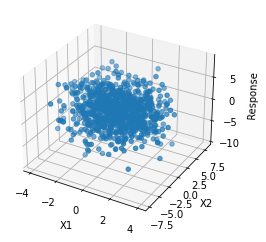

In [20]:
fig = plt.figure()
display = fig.add_subplot(projection='3d')

xs = prexVector[:,0] # x1
ys = prexVector[:,1] # x2
zs = tVector[:]      # response 
display.scatter(xs, ys, zs)

display.set_xlabel('X1')
display.set_ylabel('X2')
display.set_zlabel('Response')

plt.show()

# 10

In the scatterplot for the initial training set, we notice a trend where lots of points are congregating in the center of the plot, almost forming a solid block across. The points in the scatterplot correlate well but not perfectly.

<ipython-input-21-525c516b53c7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()
<ipython-input-21-525c516b53c7>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


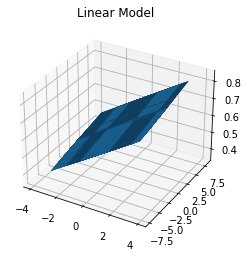

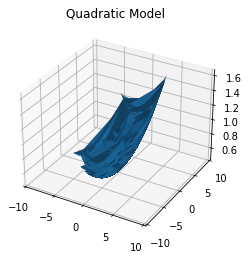

In [21]:
#Linear Pre-processing
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')

#Quadratic Pre-processing
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

# Model Setup
x1 = prexVector[:,0]
x2 = prexVector[:,1]
X, Y = np.meshgrid(x1, x2)

#plugging into and displaying Linear Model
Z = 0.59088086 + 0.04935279*X + 0.00763617*Y
ax3.plot_surface(X,Y,Z)
ax3.set_title("Linear Model")
fig3.show()

#Plugging into and displaying Qudratic Model
Z = 0.48423562 + 0.04961768*X + 0.01021747*Y + 0.03178445*(X**2) + 0.00583313*(Y)**2

ax2.set_xlim3d(-10,10)
ax2.set_ylim3d(-10,10)
ax2.plot_surface(X,Y,Z)
ax2.set_title("Quadratic Model")
fig2.show()





# 11

In the 3D Surface Plots above, the results of the previous experiments can be observed.
The linear model performs as we expect it would, and displays a straight line across. The quadratic surface model also forms a parabolic curve shape. 

<ipython-input-22-9ca184fc0652>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()
<ipython-input-22-9ca184fc0652>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


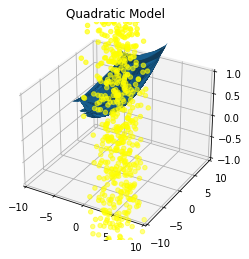

In [22]:
fig4 = plt.figure()
ax2 = fig4.add_subplot(projection='3d')
xs = prexVector[:,0] # x1
ys = prexVector[:,1] # x2
zs = tVector[:]
ax2.scatter(xs,ys,zs, c="yellow")
fig4.show()
x1 = prexVector[:,0]
x2 = prexVector[:,1]
X, Y = np.meshgrid(x1, x2)
Z = 0.48423562 + 0.04961768*X + 0.01021747*Y + 0.03178445*(X**2) + 0.00583313*(Y)**2
ax2.plot_surface(X,Y,Z)
ax2.set_title("Quadratic Model")
ax2.set_zlim3d(-1, 1)
ax2.set_xlim3d(-10, 10)
ax2.set_ylim3d(-10, 10)

fig4.show()

# 12

In the plot above, we observe the scattered data points in yellow, and our quadratic surface plot in blue. The main takeaway to notice here is that the scatterplot has points way above and way below the surface plot of the quadratic model. This allows us to conclude that even though the quadratic model is our "best polynomial order" its not that great at actually predicting the dataset. 